In [ ]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
X_test = pd.read_csv("./data/processed/X_test.csv")
y_test = pd.read_csv("./data/processed/y_test.csv")

In [4]:
with Path.open("./model/best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

In [5]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      6798
        >50K       0.78      0.65      0.71      2241

    accuracy                           0.87      9039
   macro avg       0.83      0.79      0.81      9039
weighted avg       0.86      0.87      0.86      9039



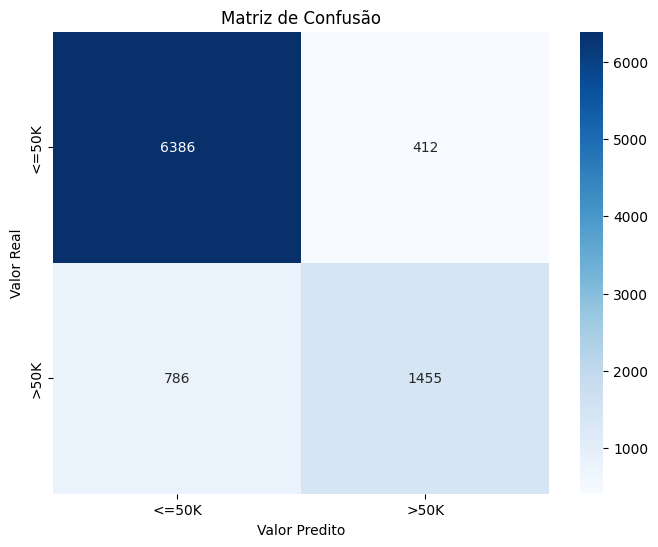

Verdadeiros Negativos (<=50K corretos): 6386
Falsos Positivos (previu >50K, era <=50K): 412
Falsos Negativos (previu <=50K, era >50K): 786
Verdadeiros Positivos (>50K corretos): 1455


In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"],
)
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.title("Matriz de Confusão")
plt.show()

print(f"Verdadeiros Negativos (<=50K corretos): {cm[0,0]}")
print(f"Falsos Positivos (previu >50K, era <=50K): {cm[0,1]}")
print(f"Falsos Negativos (previu <=50K, era >50K): {cm[1,0]}")
print(f"Verdadeiros Positivos (>50K corretos): {cm[1,1]}")